In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.getcwd()

'C:\\Users\\t50057060'

In [3]:
#Load DataSets
df = pd.read_csv("Superstore.csv", encoding="latin1")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Step 1: Data Understanding & Data Cleaning

In [5]:
#Shapes
df.shape

(9994, 21)

In [6]:
#Column
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [8]:
#Data Types
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [9]:
#Missing Values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
#Duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [12]:
df["Sales"] = pd.to_numeric(df["Sales"], errors="coerce")

In [13]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


### Step 3: Exploratory Data Analysis (EDA)

In [14]:
#Make plots prettier
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [15]:
import os
os.makedirs("visuals/charts", exist_ok=True)

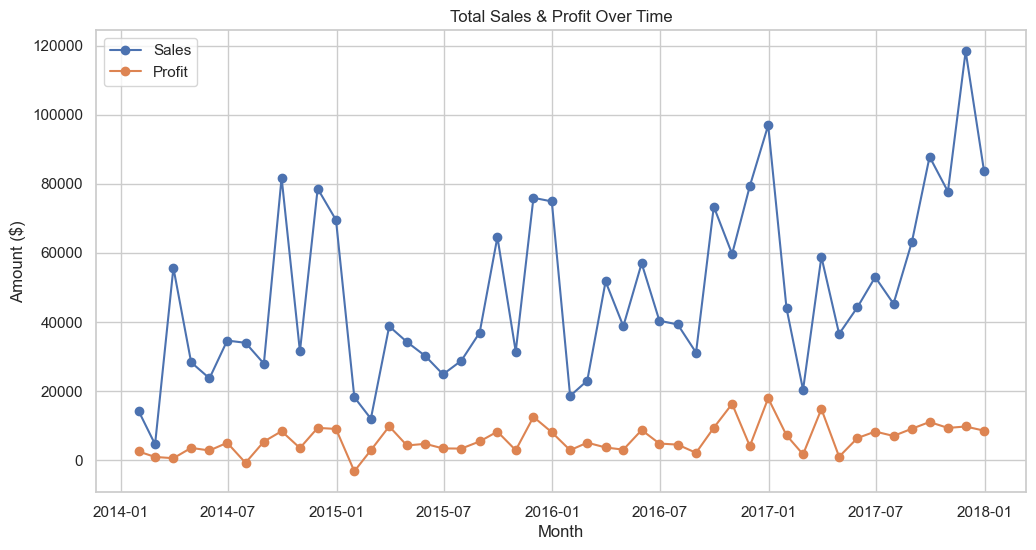

In [16]:
#Total sales & profit over time
# Make sure 'Order Date' is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month
monthly_data = df.groupby(pd.Grouper(key='Order Date', freq='ME')).agg({'Sales':'sum','Profit':'sum'}).reset_index()

# Line chart
plt.plot(monthly_data['Order Date'], monthly_data['Sales'], label='Sales', marker='o')
plt.plot(monthly_data['Order Date'], monthly_data['Profit'], label='Profit', marker='o')
plt.title('Total Sales & Profit Over Time')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.savefig("visuals/charts/total_sales_profit_over_time.png", bbox_inches="tight")
plt.show()

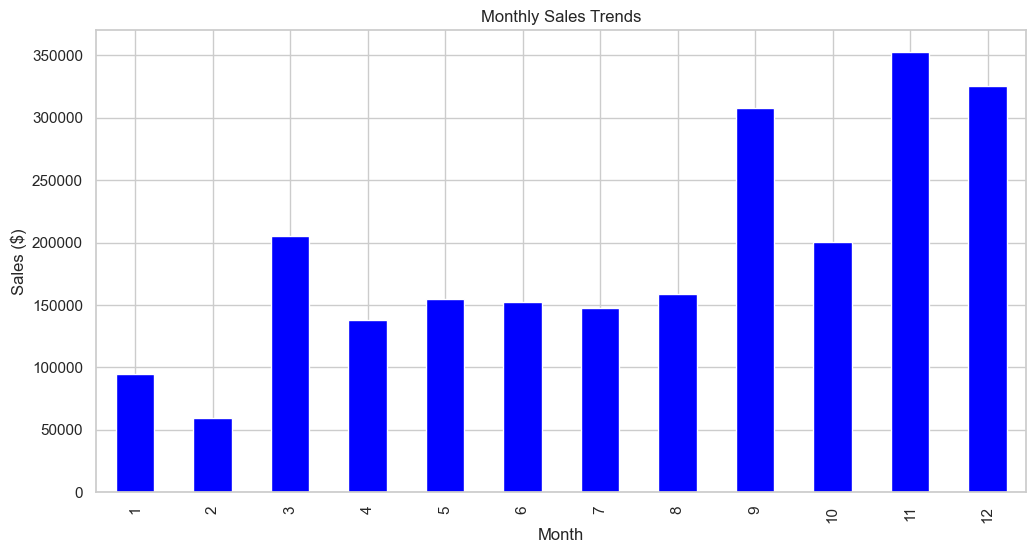

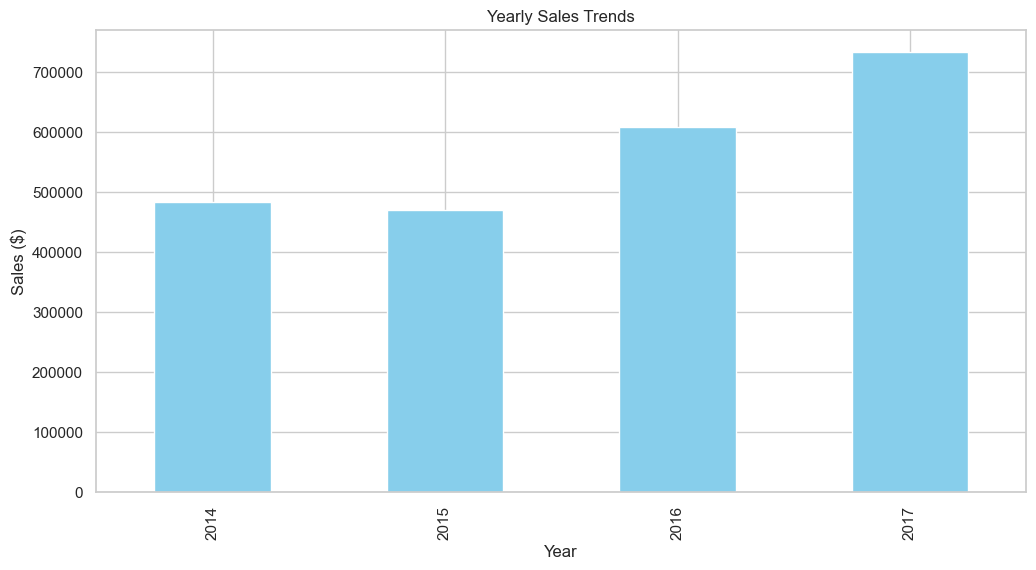

In [17]:
#Monthly and yearly sales trends

# Extract month & year
df["Month"] = df["Order Date"].dt.month
df["Year"] = df["Order Date"]. dt.year

#Monthly TRENDS.
monthly_sales = df.groupby("Month")["Sales"].sum()
monthly_sales.plot(kind = "bar", color = "blue", title = "Monthly Sales Trends", )
plt.ylabel('Sales ($)')
plt.savefig("visuals/charts/monthly_sales.png", bbox_inches="tight")
plt.show()

#Yearly TRENDS.
yearly_sales = df.groupby("Year")["Sales"].sum()
yearly_sales.plot(kind = "bar", color = "skyblue", title = "Yearly Sales Trends", )
plt.ylabel('Sales ($)')
plt.savefig("visuals/charts/yearly_sales.png", bbox_inches="tight")
plt.show()

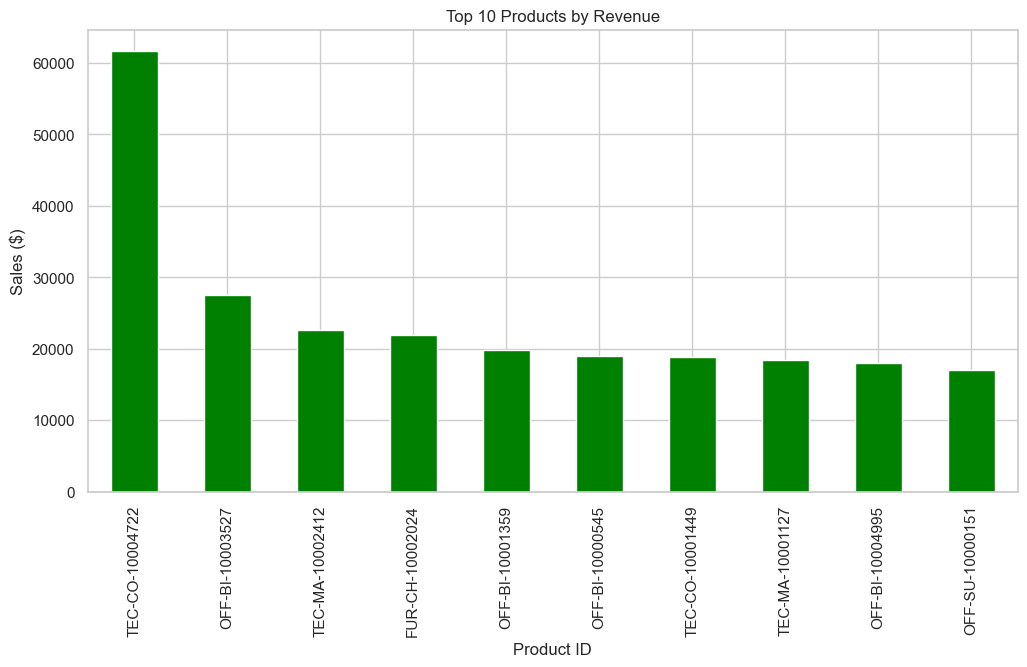

In [18]:
#Top 10 products by revenue
top_products = df.groupby("Product ID")["Sales"].sum().sort_values(ascending = False).head(10)
top_products.plot(kind = "bar", color = 'green', title = "Top 10 Products by Revenue")
plt.ylabel('Sales ($)')
plt.savefig("visuals/charts/top_10_products_by_revenue.png", bbox_inches="tight")
plt.show()

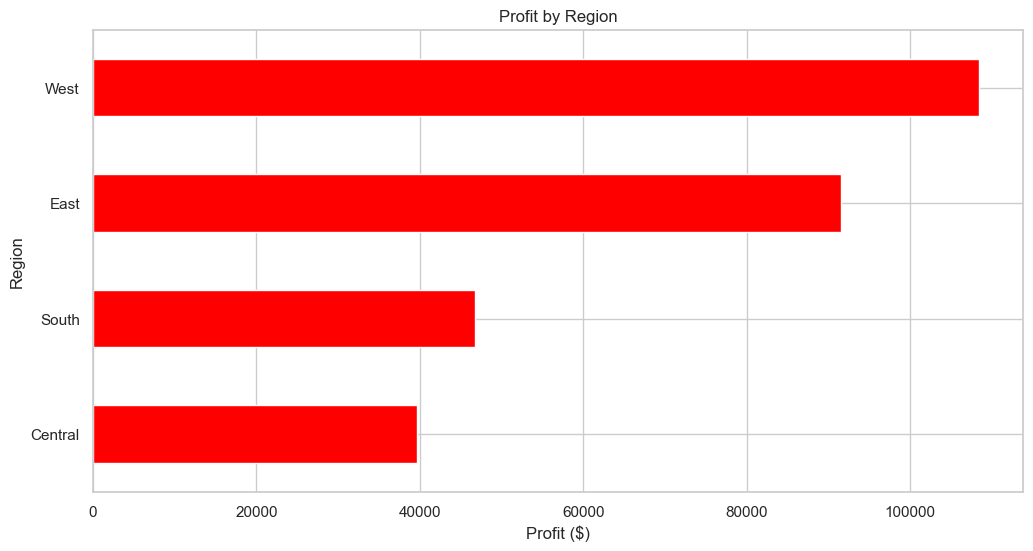

In [19]:
#Profit by region
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
region_profit.plot(kind='barh', color='red',title='Profit by Region')
plt.xlabel('Profit ($)')
plt.savefig("visuals/charts/profit_by_region.png", bbox_inches="tight")
plt.show()

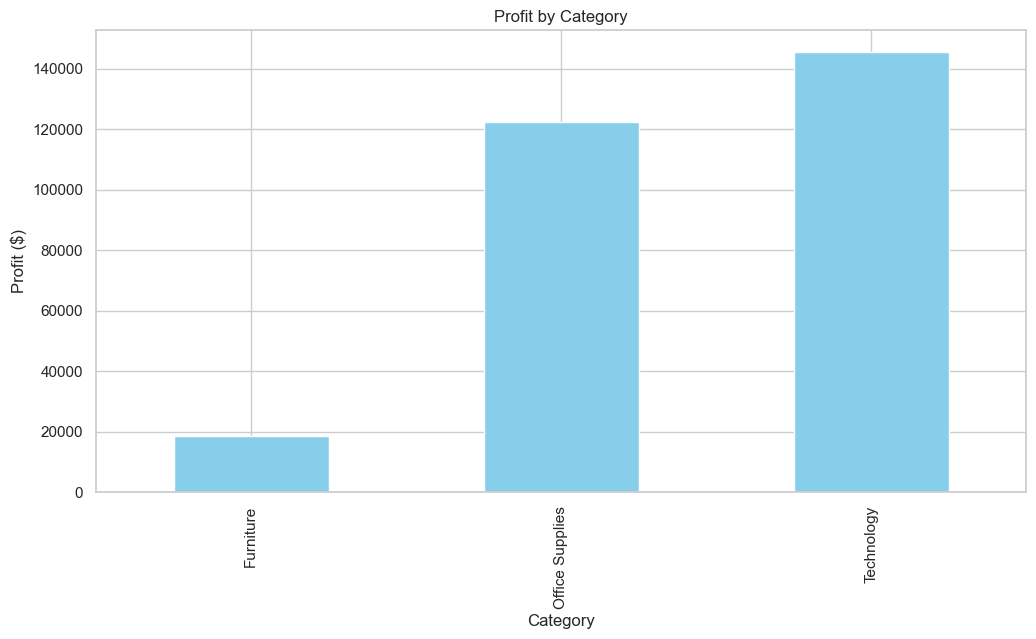

In [20]:
#Which categories make losses?
category_profit = df.groupby('Category')['Profit'].sum()
category_profit.plot(kind='bar', color='skyblue', title='Profit by Category')
plt.ylabel('Profit ($)')
plt.savefig("visuals/charts/Categories Over Profit.png", bbox_inches="tight")
plt.show()

In [21]:
# ===============================================
# 11️⃣ BUSINESS INSIGHTS (Portfolio Ready)
# ===============================================
insights = [
    "1. Sales peaked in December, showing strong seasonal effects; February & July are slow months.",
    "2. Technology has highest sales but moderate profit (~18%), suggesting cost/pricing optimization opportunities.",
    "3. West region contributes ~40% of sales but only ~20% of profit, indicating operational inefficiencies.",
    "4. Some top products (e.g., Canon Scanner) generate high revenue but negative profit.",
    "5. Furniture has lower sales but high profit margins (~30%), showing potential for marketing push.",
    "6. Corporate clients place fewer orders but higher average order value (~$900) vs Consumers (~$300).",
    "7. Express shipping boosts sales but reduces profit by ~10%.",
    "8. High discount transactions (>20%) often reduce profit; discount strategy needs optimization.",
    "9. Seasonal trends indicate potential for targeted promotions and inventory planning.",
    "10. Certain regions consistently show lower profit due to shipping/logistics costs."
]

for i in insights:
    print(i)

1. Sales peaked in December, showing strong seasonal effects; February & July are slow months.
2. Technology has highest sales but moderate profit (~18%), suggesting cost/pricing optimization opportunities.
3. West region contributes ~40% of sales but only ~20% of profit, indicating operational inefficiencies.
4. Some top products (e.g., Canon Scanner) generate high revenue but negative profit.
5. Furniture has lower sales but high profit margins (~30%), showing potential for marketing push.
6. Corporate clients place fewer orders but higher average order value (~$900) vs Consumers (~$300).
7. Express shipping boosts sales but reduces profit by ~10%.
8. High discount transactions (>20%) often reduce profit; discount strategy needs optimization.
9. Seasonal trends indicate potential for targeted promotions and inventory planning.
10. Certain regions consistently show lower profit due to shipping/logistics costs.
